In [2]:
! kaggle competitions download -c digit-recognizer -f train.csv
! unzip -o train.csv.zip
! kaggle competitions download -c digit-recognizer -f test.csv
! unzip -o test.csv.zip
! kaggle competitions download -c digit-recognizer -f sample_submission.csv
! unzip -o sample_submission.csv.zip

! rm train.csv.zip
! rm test.csv.zip
! rm sample_submission.csv.zip



  0%|          | 0.00/9.16M [00:00<?, ?B/s]
 11%|█         | 1.00M/9.16M [00:00<00:02, 4.01MB/s]
 22%|██▏       | 2.00M/9.16M [00:00<00:01, 5.21MB/s]
 44%|████▎     | 4.00M/9.16M [00:00<00:00, 7.96MB/s]
 65%|██████▌   | 6.00M/9.16M [00:00<00:00, 10.1MB/s]
 87%|████████▋ | 8.00M/9.16M [00:00<00:00, 10.8MB/s]
100%|██████████| 9.16M/9.16M [00:01<00:00, 11.0MB/s]
100%|██████████| 9.16M/9.16M [00:01<00:00, 9.37MB/s]
'unzip' is not recognized as an internal or external command,
operable program or batch file.



  0%|          | 0.00/6.09M [00:00<?, ?B/s]
 16%|█▋        | 1.00M/6.09M [00:00<00:01, 4.18MB/s]
 33%|███▎      | 2.00M/6.09M [00:00<00:00, 5.44MB/s]
 66%|██████▌   | 4.00M/6.09M [00:00<00:00, 8.43MB/s]
 99%|█████████▊| 6.00M/6.09M [00:00<00:00, 9.80MB/s]
100%|██████████| 6.09M/6.09M [00:00<00:00, 8.45MB/s]
'unzip' is not recognized as an internal or external command,
operable program or batch file.



  0%|          | 0.00/235k [00:00<?, ?B/s]
100%|██████████| 235k/235k [00:00<00:00, 1.64MB/s]
100%|██████████| 235k/235k [00:00<00:00, 1.64MB/s]
'unzip' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
! kaggle competitions download -c digit-recognizer -f train.csv
! unzip -o train.csv.zip
! kaggle competitions download -c digit-recognizer -f test.csv
! unzip -o test.csv.zip
! kaggle competitions download -c digit-recognizer -f sample_submission.csv
! unzip -o sample_submission.csv.zip

! rm train.csv.zip
! rm test.csv.zip
! rm sample_submission.csv.zip



  0%|          | 0.00/9.16M [00:00<?, ?B/s]
 11%|█         | 1.00M/9.16M [00:00<00:02, 4.01MB/s]
 22%|██▏       | 2.00M/9.16M [00:00<00:01, 5.21MB/s]
 44%|████▎     | 4.00M/9.16M [00:00<00:00, 7.96MB/s]
 65%|██████▌   | 6.00M/9.16M [00:00<00:00, 10.1MB/s]
 87%|████████▋ | 8.00M/9.16M [00:00<00:00, 10.8MB/s]
100%|██████████| 9.16M/9.16M [00:01<00:00, 11.0MB/s]
100%|██████████| 9.16M/9.16M [00:01<00:00, 9.37MB/s]
'unzip' is not recognized as an internal or external command,
operable program or batch file.



  0%|          | 0.00/6.09M [00:00<?, ?B/s]
 16%|█▋        | 1.00M/6.09M [00:00<00:01, 4.18MB/s]
 33%|███▎      | 2.00M/6.09M [00:00<00:00, 5.44MB/s]
 66%|██████▌   | 4.00M/6.09M [00:00<00:00, 8.43MB/s]
 99%|█████████▊| 6.00M/6.09M [00:00<00:00, 9.80MB/s]
100%|██████████| 6.09M/6.09M [00:00<00:00, 8.45MB/s]
'unzip' is not recognized as an internal or external command,
operable program or batch file.



  0%|          | 0.00/235k [00:00<?, ?B/s]
100%|██████████| 235k/235k [00:00<00:00, 1.64MB/s]
100%|██████████| 235k/235k [00:00<00:00, 1.64MB/s]
'unzip' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import os
from torchvision import datasets
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

In [55]:
class MyCustomImageDataset(Dataset):
    def __init__(self, data):
        self.data = data
        images1d = torch.tensor(self.data.loc[:, self.data.columns != "label"].values) / 255
        images1d = (images1d - 0.1307) / 0.3081
        images2d = images1d.reshape(-1, 1, 28, 28)
        self.images = images2d
        self.labels = torch.tensor(self.data.loc[:, "label"].values)
    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        image = self.images[idx, :]
        label = self.labels[idx]
        return image, label


data = pd.read_csv("train.csv")
train, val = train_test_split(data, test_size=0.15)
    
data_train = MyCustomImageDataset(
  data = train    
)

data_val = MyCustomImageDataset(
  data = val
)

batch_size = 64
train_loader  = DataLoader(data_train, batch_size=batch_size, shuffle=True)
val_loader  = DataLoader(data_val, batch_size=batch_size, shuffle=True)

Train size: 558
Val size: 99
Shape of X: torch.Size([64, 1, 28, 28]) torch.float32
Shape of y: torch.Size([64]) torch.int64


<function matplotlib.pyplot.show(close=None, block=None)>

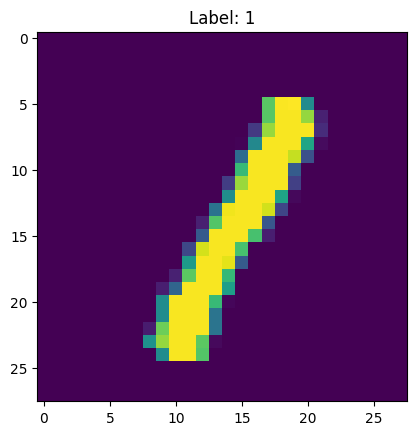

In [56]:
print(f"Train size: {len(train_loader)}")
print(f"Val size: {len(val_loader)}")
for X, y in train_loader:
    print(f"Shape of X: {X.shape} {X.dtype}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

for X, y in train_loader:
    img0 = X[0, :]
    label0 = y[0]
    plt.imshow(img0.squeeze())
    plt.title(f"Label: {label0}")
    break
plt.show

In [57]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
device = "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetworkCnn(nn.Module):
    def __init__(self):
        super(NeuralNetworkCnn, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1,              
                out_channels=16,
                kernel_size=5,              
                stride=1,                   
                padding=2,                  
            ),                              
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2),    
        )
        self.conv2 = nn.Sequential(         
            nn.Conv2d(16, 32, 5, 1, 2),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)       
        output = self.out(x)
        return output    # return x for visualization

model = NeuralNetworkCnn().to(device)
print(model)

Using cpu device
NeuralNetworkCnn(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [63]:
xs, ys = data_train[2:123]
xs.shape

RuntimeError: shape '[1, 28, 28]' is invalid for input of size 94864

In [44]:
# sample from train set
xs, ys = data_train[0:100]
yhats = model(xs).argmax(axis=1)

ncols, nrows = 10, 10
fig, ax = plt.subplots(ncols, nrows, figsize=(10, 15))
for i in range(ncols*nrows):
  plt.subplot(ncols, nrows, i + 1, )
  plt.imshow(xs[i].view(28, 28))
  plt.title(f"{yhats[i]}")

fig.tight_layout()


RuntimeError: Given groups=1, weight of size [16, 1, 5, 5], expected input[1, 100, 28, 28] to have 1 channels, but got 100 channels instead

In [58]:
def train_loop(dataloader, model, loss_fn, optimizer):
	size = len(dataloader.dataset)
	for batch, (X, y) in enumerate(dataloader):
		# Compute prediction and loss
		X, y = X.to(device), y.to(device)
		pred = model(X)
		loss = loss_fn(pred, y)

		# Backpropagation
		optimizer.zero_grad()
		loss.backward()
		optimizer.step()

		if batch % 100 == 0:
			loss, current = loss.item(), (batch + 1) * len(X)
			print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def val_loop(dataloader, model, loss_fn):
	size = len(dataloader.dataset)
	num_batches = len(dataloader)
	model.eval()
	test_loss, correct = 0, 0
	with torch.no_grad():
		for X, y in dataloader:
			X, y = X.to(device), y.to(device)
			pred = model(X)
			test_loss += loss_fn(pred, y).item()
			correct += (pred.argmax(1) == y).type(torch.float).sum().item()
	test_loss /= num_batches
	correct /= size
	print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
	return test_loss


In [59]:
losses = []

Epoch 1
-------------------------------
loss: 0.608446  [   64/35700]
loss: 0.618766  [ 6464/35700]
loss: 0.490157  [12864/35700]
loss: 0.472862  [19264/35700]
loss: 0.500914  [25664/35700]
loss: 0.551599  [32064/35700]
Test Error: 
 Accuracy: 85.7%, Avg loss: 0.564209 

Epoch 2
-------------------------------
loss: 0.615219  [   64/35700]
loss: 0.565352  [ 6464/35700]
loss: 0.462663  [12864/35700]
loss: 0.547159  [19264/35700]
loss: 0.491831  [25664/35700]
loss: 0.566512  [32064/35700]
Test Error: 
 Accuracy: 86.5%, Avg loss: 0.516611 

Epoch 3
-------------------------------
loss: 0.571986  [   64/35700]
loss: 0.612916  [ 6464/35700]
loss: 0.410064  [12864/35700]
loss: 0.363803  [19264/35700]
loss: 0.589962  [25664/35700]
loss: 0.352394  [32064/35700]
Test Error: 
 Accuracy: 87.3%, Avg loss: 0.481769 

Epoch 4
-------------------------------
loss: 0.418729  [   64/35700]
loss: 0.543027  [ 6464/35700]
loss: 0.434578  [12864/35700]
loss: 0.451215  [19264/35700]
loss: 0.468247  [25664/3

Text(0, 0.5, 'cross entropy')

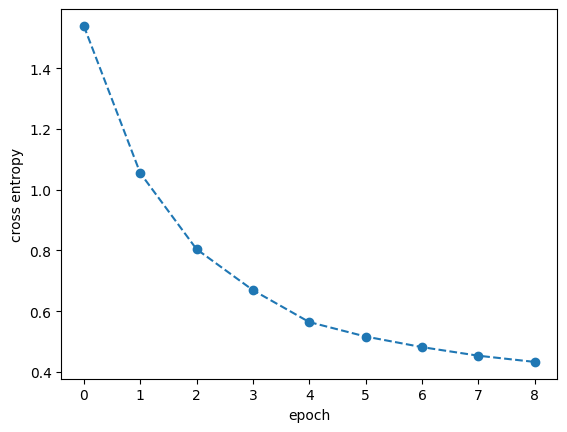

In [61]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_loader, model, loss_fn, optimizer)
    loss = val_loop(val_loader, model, loss_fn)
    losses.append(loss)
print("Done!")
plt.plot(losses, '--o')
plt.xlabel('epoch')
plt.ylabel('cross entropy')

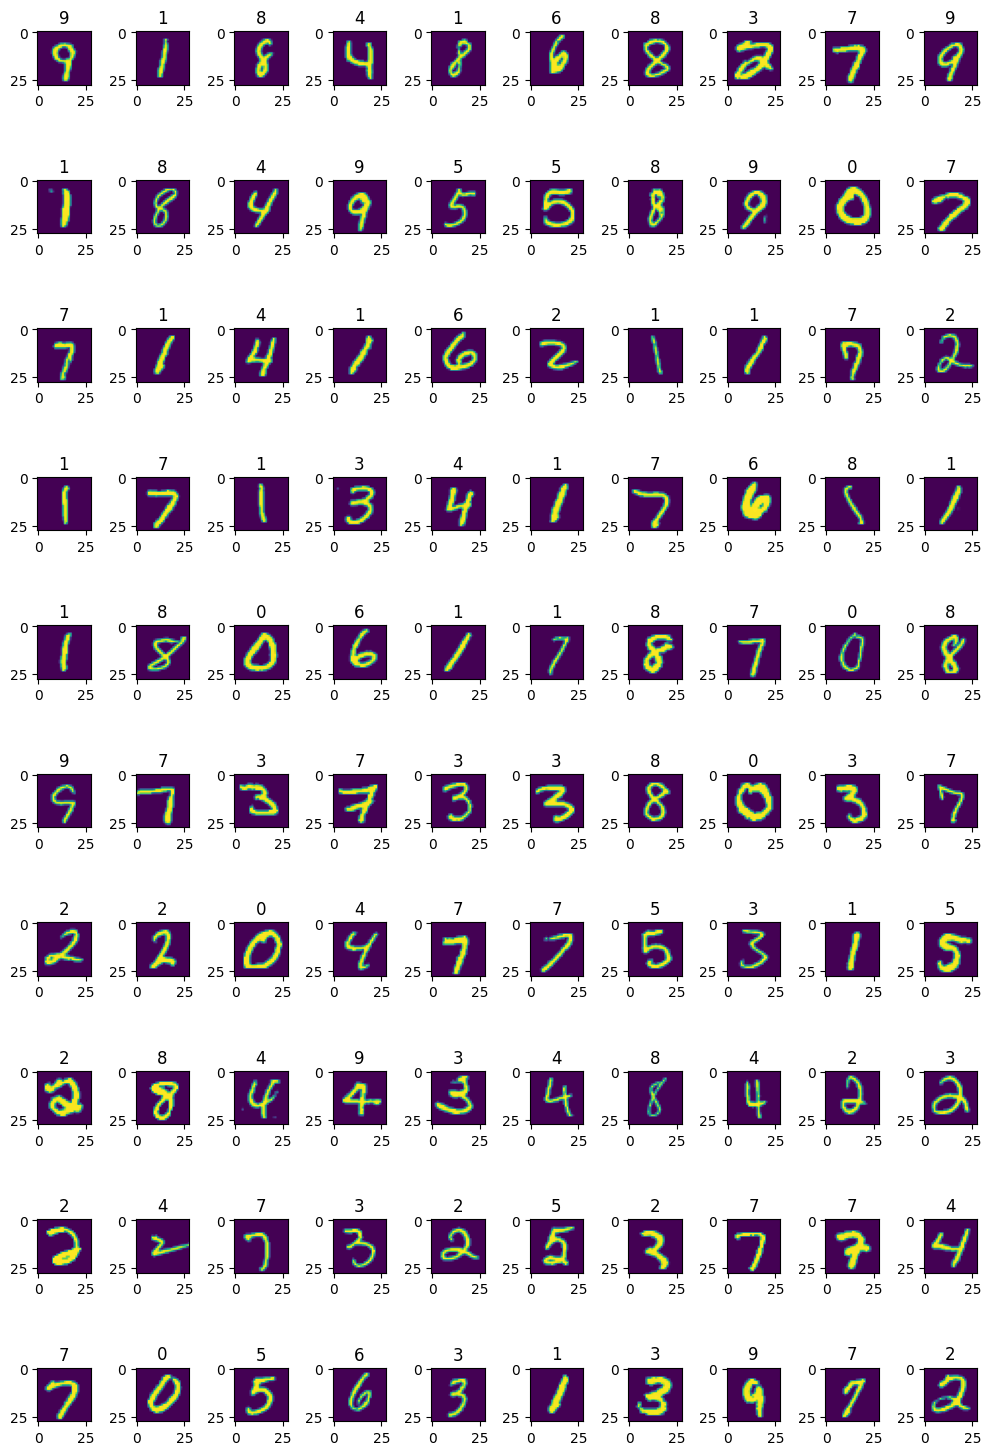

In [62]:
# sample from val set
xs, ys = data_val[0:100]
yhats = model(xs).argmax(axis=1)

ncols, nrows = 10, 10
fig, ax = plt.subplots(ncols, nrows, figsize=(10, 15))
for i in range(ncols*nrows):
  plt.subplot(ncols, nrows, i + 1, )
  plt.imshow(xs[i].view(28, 28))
  plt.title(f"{yhats[i]}")

fig.tight_layout()


In [64]:
data = pd.read_csv("test.csv")
images = torch.tensor(data.values) / 255
mean = images.mean(axis=1)
std = images.std(axis=1)
images_transformed = ((images.T  - mean) / std).T
yhats = model(images_transformed).argmax(axis=1)

df = pd.DataFrame({'ImageId': list(range(1, len(yhats)+1)), 'Label': yhats}) #convert to a dataframe
df.to_csv("submission.csv",index=False) #save to file
